<a href="https://colab.research.google.com/github/Grace02505/Notebook/blob/main/applestock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address

In [40]:
import numpy as np
import pandas as pd

#df = pd.read_csv("appl_1980_2014.csv")
#np.genfromtxt('appl_1980_2014.csv', delimiter=',')
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"
df = pd.read_csv(url)
print(df.head)


<bound method NDFrame.head of             Date   Open   High    Low  Close     Volume  Adj Close
0     2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35
1     2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2     2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
3     2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
4     2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
...          ...    ...    ...    ...    ...        ...        ...
8460  1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
8461  1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
8462  1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
8463  1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
8464  1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45

[8465 rows x 7 columns]>


Step 3. Assign it to a variable apple

In [41]:
apple = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")

 Check out the type of the columns

In [42]:
column_types = apple.dtypes
print(column_types)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


Step 5. Transform the Date column as a datetime type

In [43]:
apple['Date'] = pd.to_datetime(apple['Date'])
print(apple.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


Step 6. Set the date as the index

In [44]:
apple.set_index('Date', inplace=True)
print(apple)

             Open   High    Low  Close     Volume  Adj Close
Date                                                        
2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
...           ...    ...    ...    ...        ...        ...
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45

[8465 rows x 6 columns]


Step 7. Is there any duplicate dates?

In [50]:
duplicates = apple.duplicated()
print(apple[duplicates])

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Adj Close]
Index: []


Step 8. Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [45]:
apple.sort_index()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


Step 9. Get the last business day of each month

Step 10. What is the difference in days between the first day and the oldest

In [46]:
from datetime import datetime

first_day = apple.index.min()

oldest_day = apple.index.max()

difference = (oldest_day - first_day)
print(difference)




12261 days 00:00:00


Step 11. How many months in the data we have?

In [48]:
num_months = len(apple.resample('M').mean().index)
print("Number of months in the dataset:", num_months)


Number of months in the dataset: 404


Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 **inches**

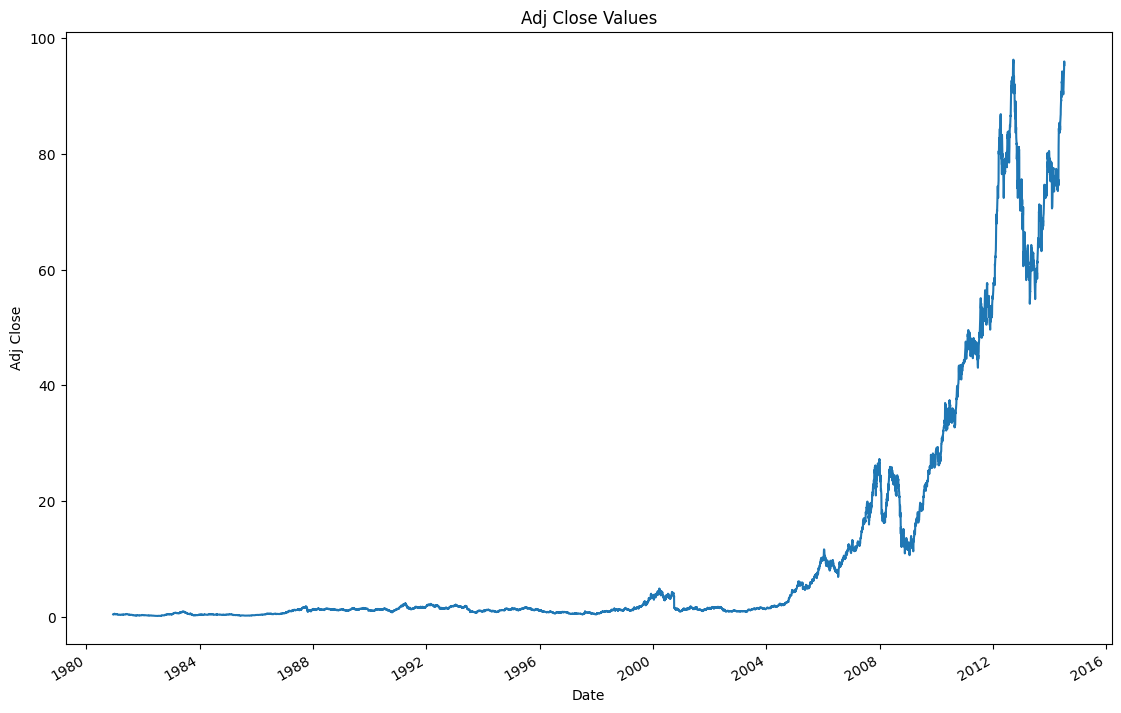

In [49]:

import matplotlib.pyplot as plt

# Plotting the 'Adj Close' values
plt.figure(figsize=(13.5, 9))  # Set the size of the figure

apple['Adj Close'].plot()

plt.title('Adj Close Values')  # Set the title of the plot
plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Adj Close')  # Set the y-axis label

plt.show()
